# Predicting Appliance Energy Consumption In Households

Develop a robust machine learning model to accurately predict appliance energy consumption in households. By utilizing this model, the company aims to improve energy efficiency recommendations, optimize power grid management, and help customers reduce their energy costs.

**Project Benefits:**


1.   Energy Optimization: The model will help identify factors influencing appliance energy consumption, allowing for more targeted energy-saving strategies.
2.   Cost Reduction: By predicting energy usage accurately, customers can better manage their consumption and reduce energy bills.
3.  Grid Management: Understanding household energy patterns can assist in better power grid management and load balancing.



**Output:**

A documented machine learning model specifically designed for

1.   A documented machine learning model specifically designed for predicting appliance energy consumption.
2.   Comprehensive data visualizations illustrating relationships between various environmental factors and energy usage.
3.   A comparative analysis of different machine learning algorithms for this prediction task.



# **DATA SETUP AND LOADING**

Import all necessary libraries and load the dataset

In [ ]:
#ENERGY CONSUMPTION PREDICTION
#ARIES DIMAANO
#dimaanoac@gmail.com

#Import Libraries
!pip install scikit-learn==1.5.0 #to avoid xgboost error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

Perform an initial examination of the data to understand its structure, data types, and basic statistics

In [ ]:
#Load Dataset
os.getcwd()
os.chdir('/content/drive/MyDrive/DATA SCIENCE PROJECT/Predicting Appliance Energy Consumption In Households')
df = pd.read_csv('energydata_complete.csv')

In [ ]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11-01-2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11-01-2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11-01-2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11-01-2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11-01-2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410390  45.410390  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.412580    755.522602   
std    ...      2.014712      4.151497      5.318464      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.670000    750.933333   
50%    ...     19.390000     40.900000      6.920000    756.100000   
75%    ...     20.600000     44.338095     10.400000    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760995     24.988033   
std       14.901088      2.451221     11.794719      4.195248     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.430000     24.897653   
75%       91.666667      5.500000     40.000000      6.570000     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [ ]:
df.isna().sum() #Check for missing values

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
df.duplicated().sum() #Check for duplicates

0

In [ ]:
#Convert the first column to datetime objects
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M', errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [ ]:
#Set 'date' column as the index
df = df.set_index('date')

In [ ]:
df.head()

Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4  ...         T9  \
date                                                         ...              
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667  ...  17.033333   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500  ...  17.066667   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000  ...  17.000000   
2016-01-11 17:30:00  19.79  45.000000  18.890000  45.723333  ...  17.000000   
2016-01-11 17:40:00  19.79  45.000000  18.890000  45.530000  ...  17.000000   

                      RH_9  T_out  Press_mm_hg  RH_out  Windspeed  Visibility  \
date                                                                            
2016-01-11 17:00:00  45.53   6.60        733.5    92.0   7.000000   63.000000   
2016-01-11 17:10:00  45.56   6.48        733.6    92.0   6.666667   59.166667   
2016-01-11 17:20:00  45.50   6.37        733.7    92.0   6.333333   55.333333   
2016-01-11 17:30:00  45.40   6.25        733.8    92.0   6.000000   51.500000   
2016-01-11 17:40:00  45.40   6.13        733.9    92.0   5.666667   47.666667   

                     Tdewpoint        rv1        rv2  
date                                                  
2016-01-11 17:00:00        5.3  13.275433  13.275433  
2016-01-11 17:10:00        5.2  18.606195  18.606195  
2016-01-11 17:20:00        5.1  28.642668  28.642668  
2016-01-11 17:30:00        5.0  45.410390  45.410390  
2016-01-11 17:40:00        4.9  10.084097  10.084097  

[5 rows x 28 columns]

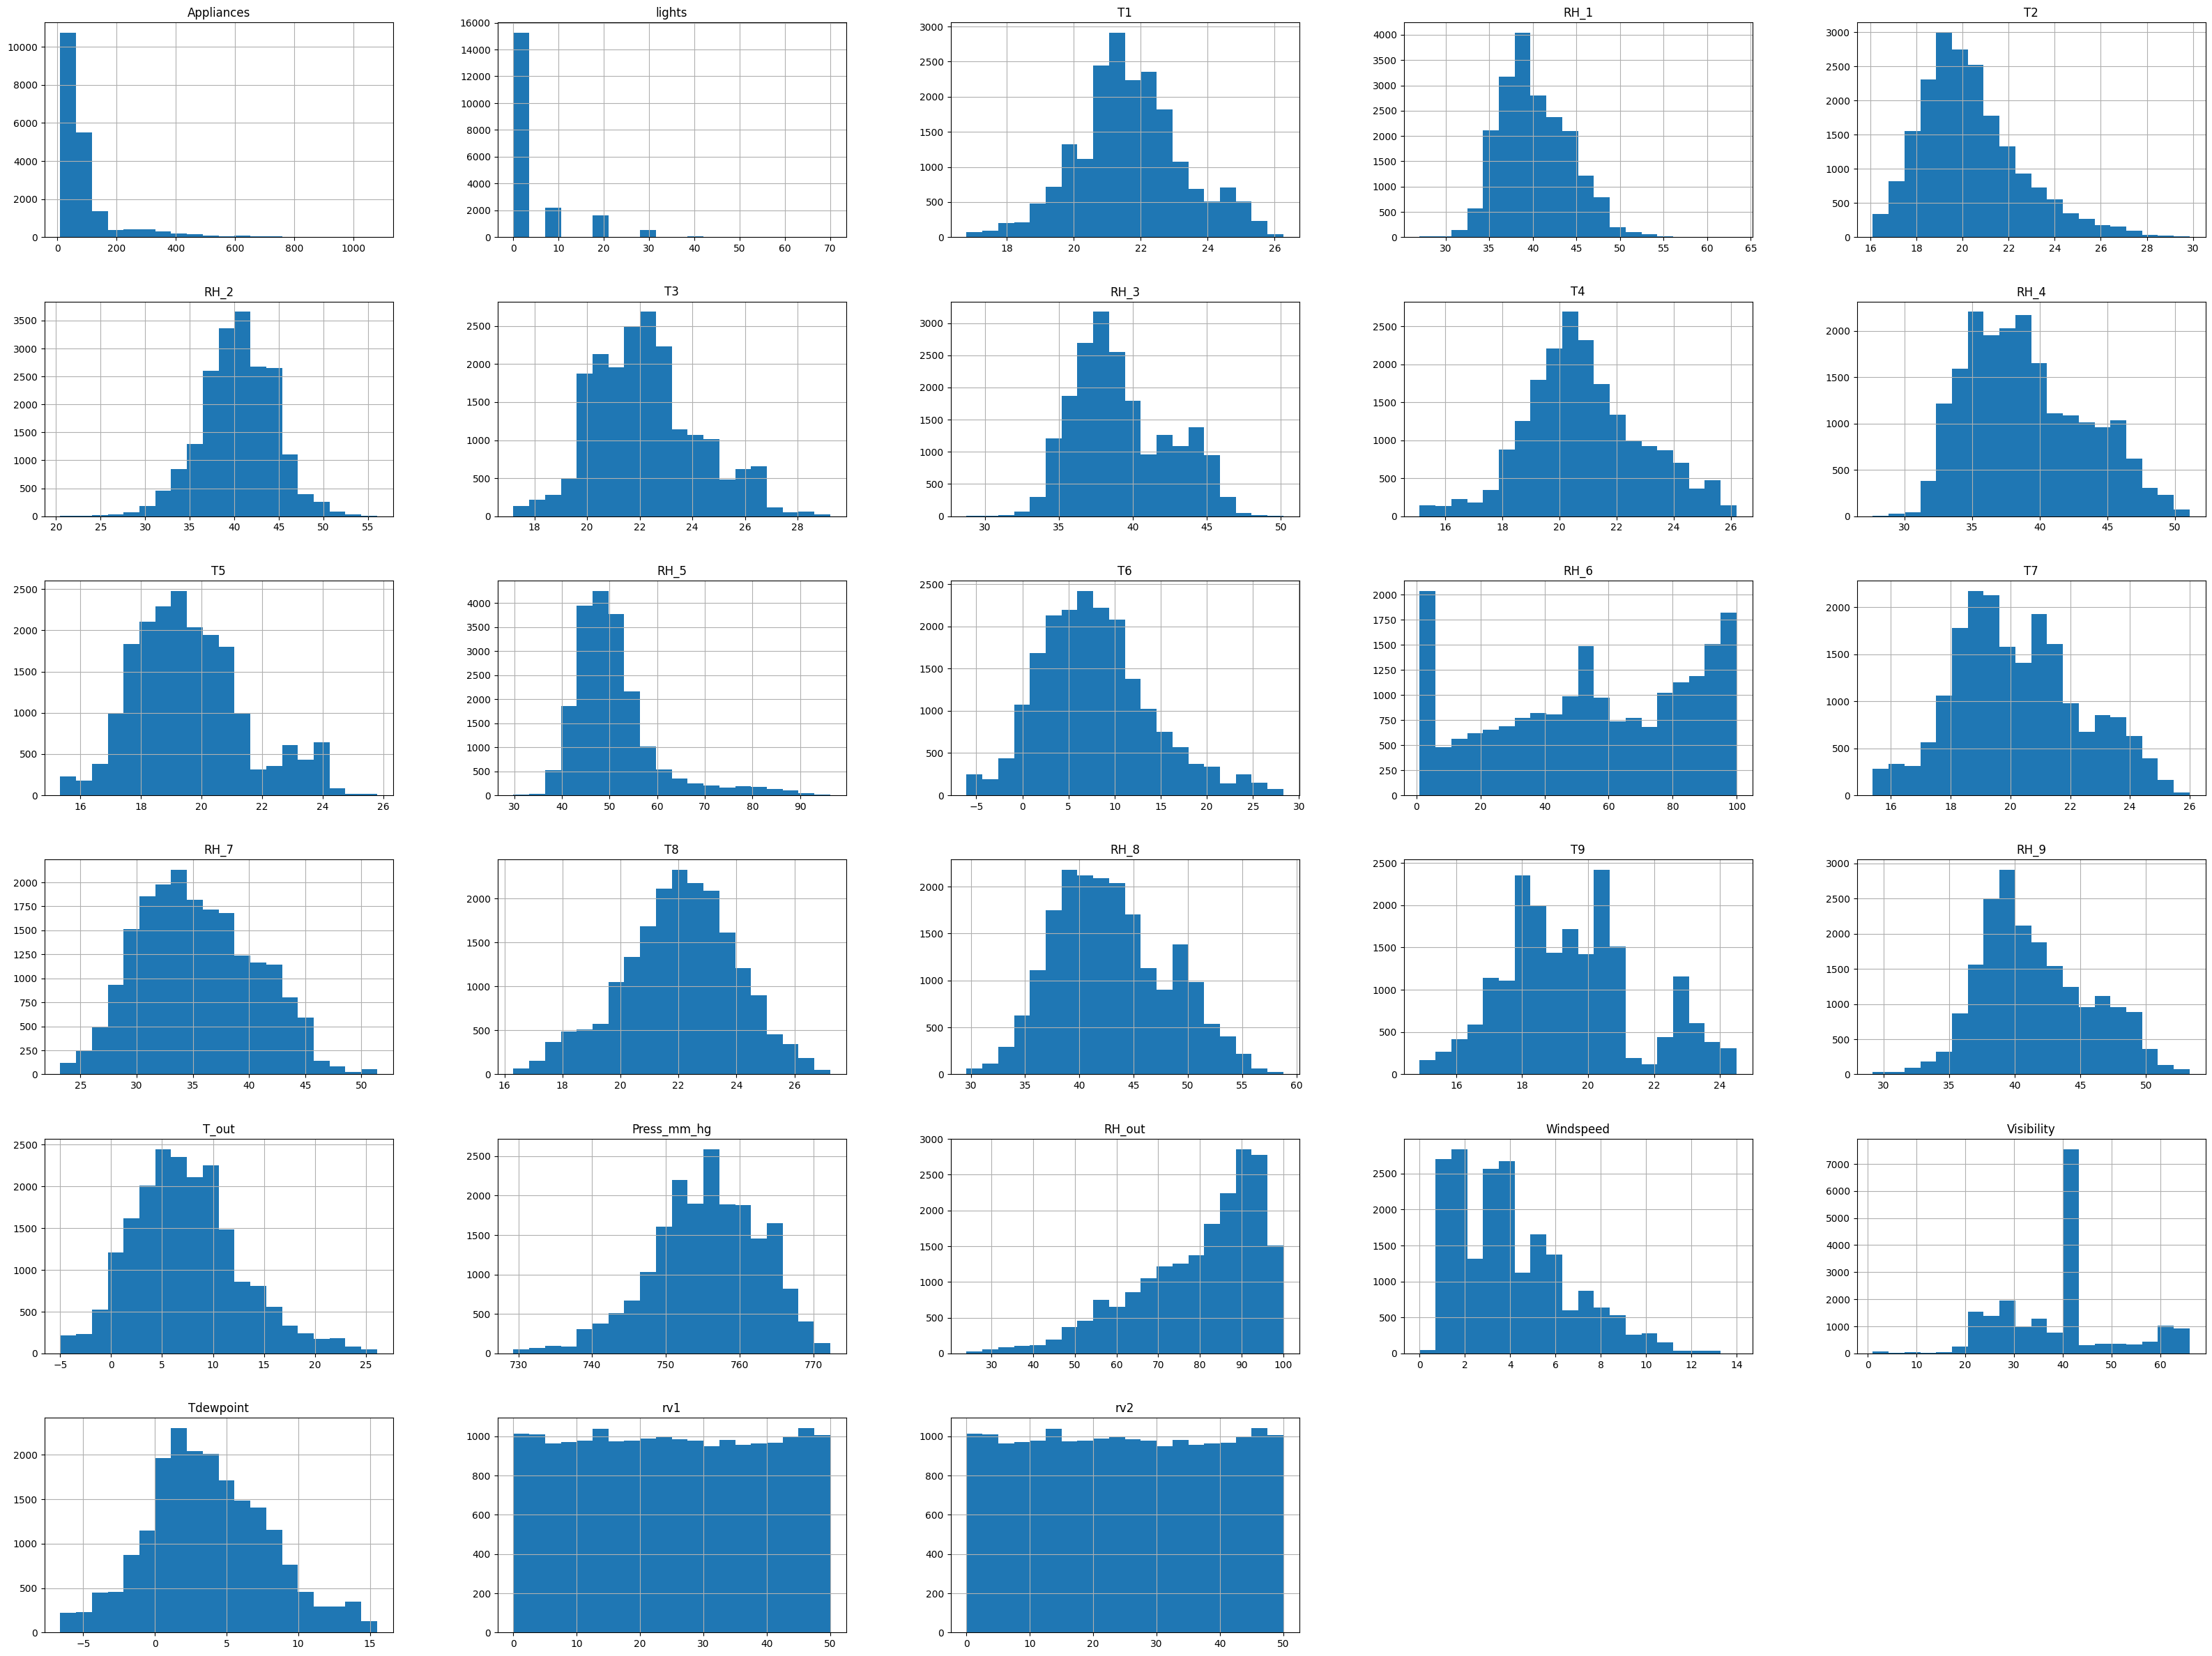

In [ ]:
#Explore the data with Histogram
df.hist(bins=20, figsize=(40,30))
plt.show()

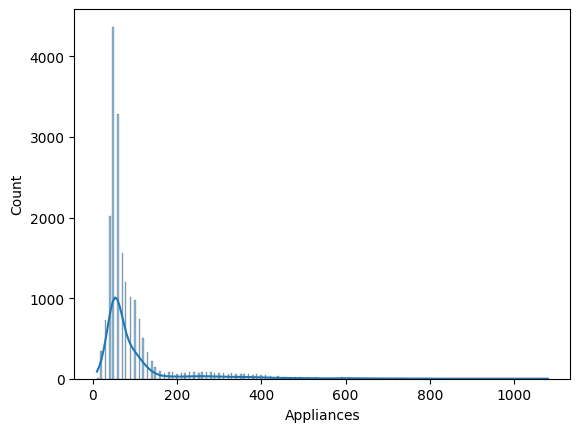

In [ ]:
#Explore the target data with Histogram
sns.histplot(df['Appliances'], kde=True)
plt.show()

<Figure size 1200x700 with 0 Axes>

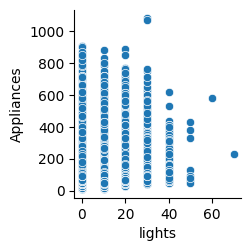

In [ ]:
#Pairplot target features vs lights
plt.figure(figsize=(12,7))
sns.pairplot(df, x_vars=['lights'], y_vars=['Appliances'])
plt.show()

<Figure size 1200x700 with 0 Axes>

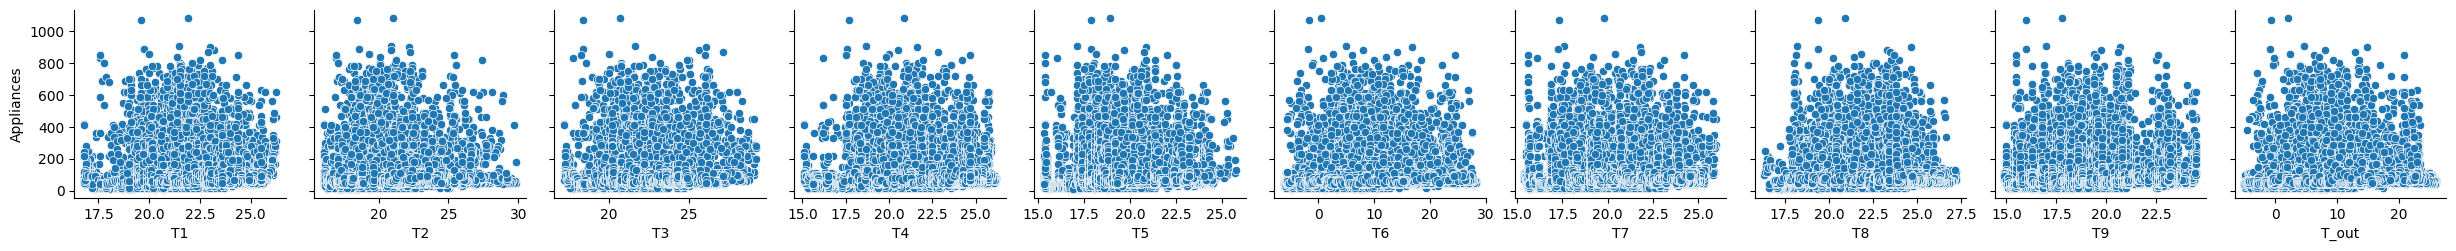

In [ ]:
#Pairplot target features vs Temperature features
plt.figure(figsize=(12,7))
sns.pairplot(df, x_vars=[ 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out'], y_vars=['Appliances'])
plt.show()

<Figure size 1200x700 with 0 Axes>

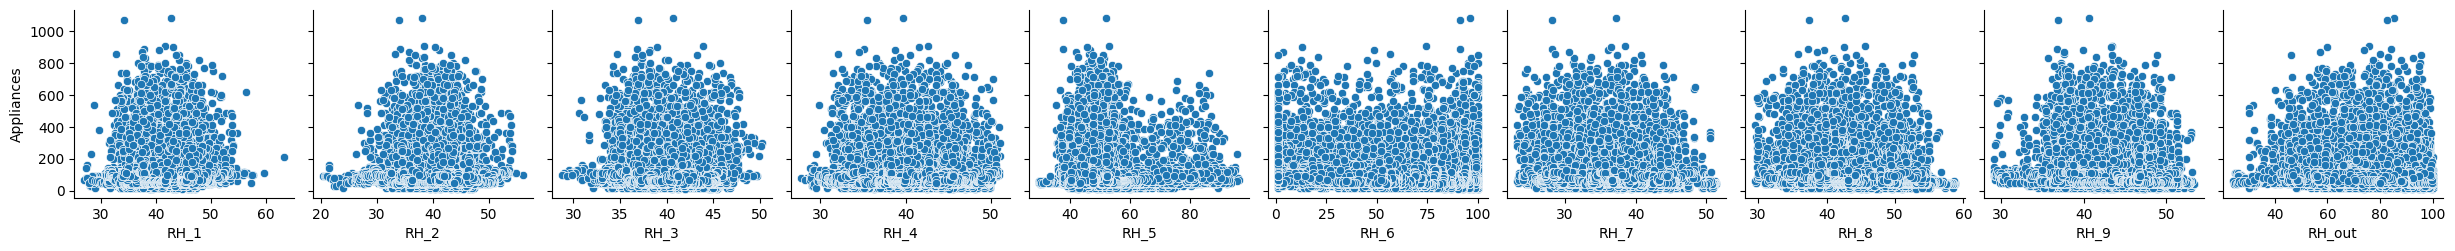

In [ ]:
#Pairplot target features vs Humidity
plt.figure(figsize=(12,7))
sns.pairplot(df, x_vars=[ 'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'RH_out'], y_vars=['Appliances'])
plt.show()

<Figure size 1200x700 with 0 Axes>

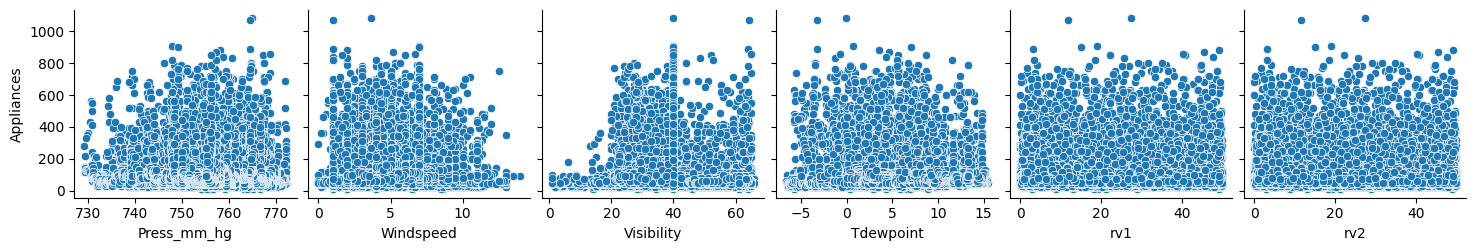

In [ ]:
#Pairplot target features vs other features
plt.figure(figsize=(12,7))
sns.pairplot(df, x_vars=['Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'], y_vars=['Appliances'])
plt.show()

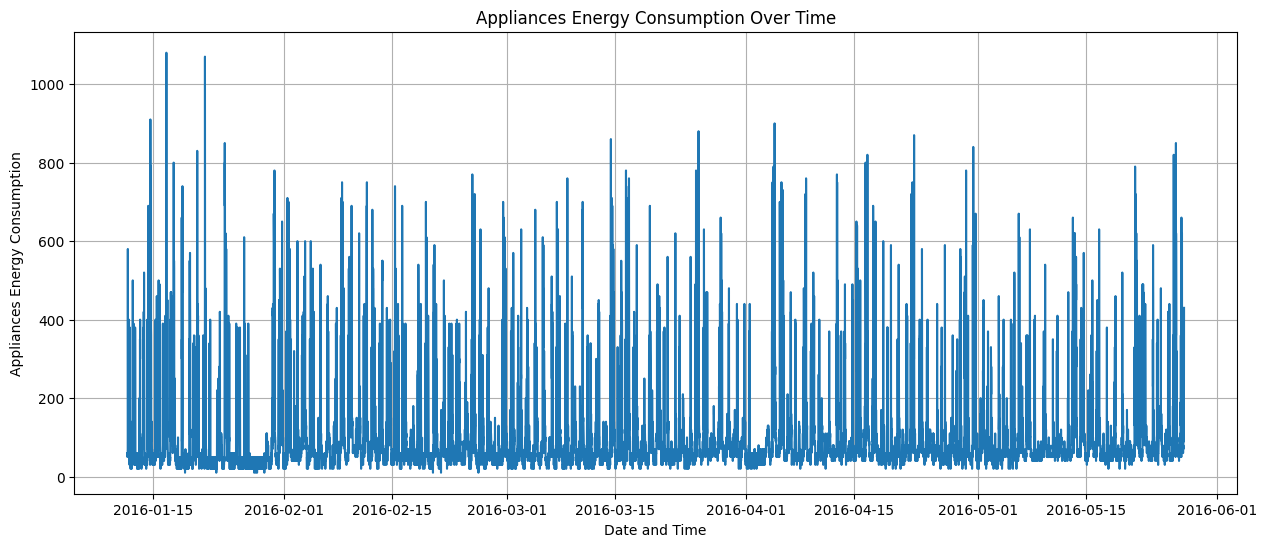

In [ ]:
#Plot time series of 'Appliances' energy consumption
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Appliances'])
plt.xlabel('Date and Time')
plt.ylabel('Appliances Energy Consumption')
plt.title('Appliances Energy Consumption Over Time')
plt.grid(True)
plt.show()

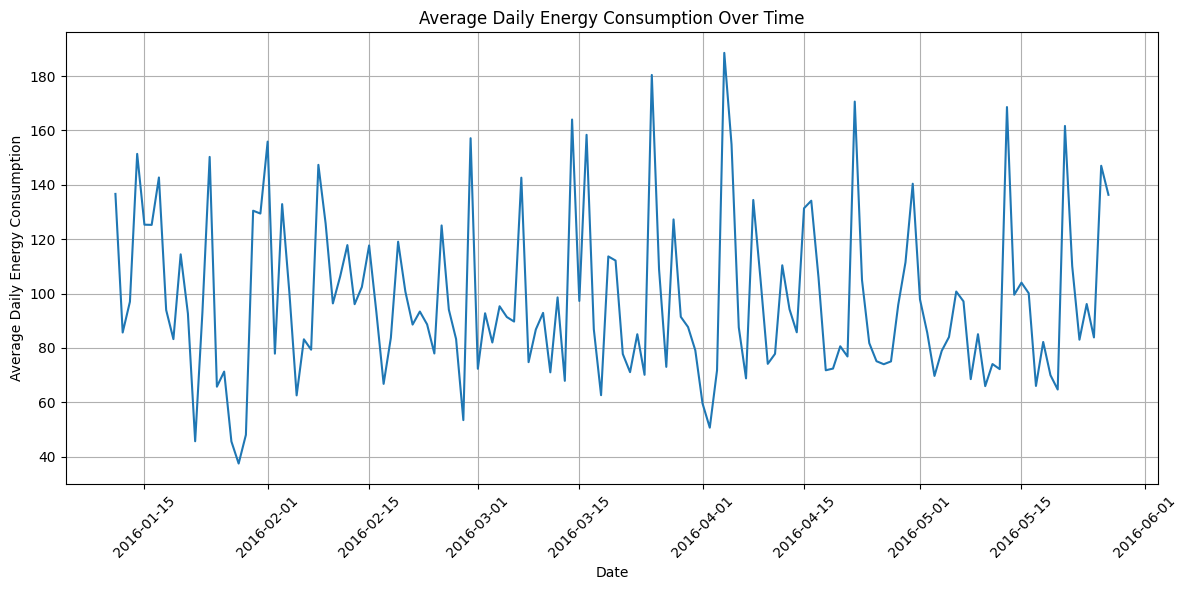

In [ ]:
#Calculate daily average energy consumption
daily_avg_con = df['Appliances'].resample('D').mean()

#Create the line graph for daily average energy consumption
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_con.index, daily_avg_con.values)
plt.xlabel('Date')
plt.ylabel('Average Daily Energy Consumption')
plt.title('Average Daily Energy Consumption Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

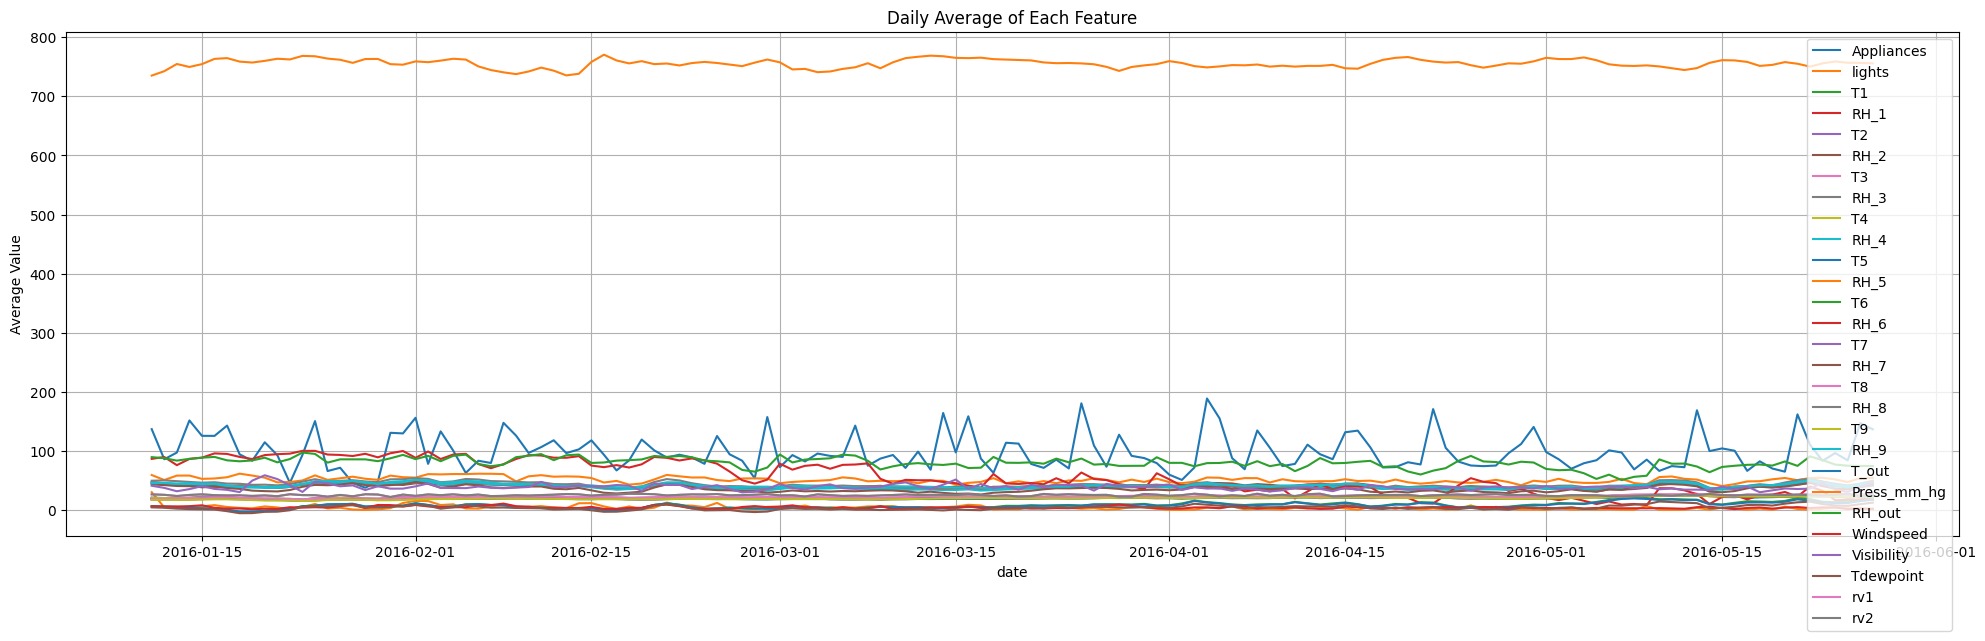

In [ ]:
#Calculate daily average energy consumption
daily_avg = df.resample('D').mean()

#Create the histogram
plt.figure(figsize=(20, 6))

for column in daily_avg.columns:
    plt.plot(daily_avg.index,daily_avg[column].values, label=column)

plt.xlabel('date')
plt.ylabel('Average Value')
plt.title('Daily Average of Each Feature')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

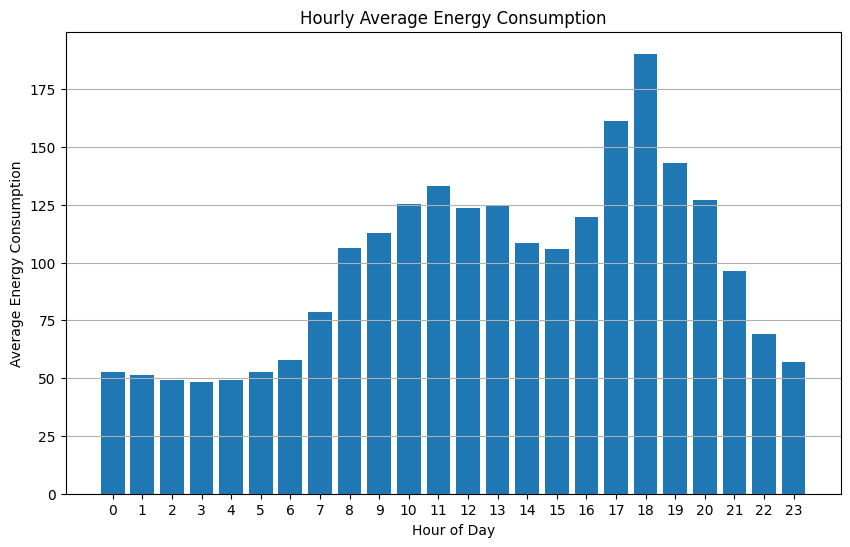

In [ ]:
#Group data by hour and calculate the mean energy consumption for each hour
hourly_avg = df['Appliances'].groupby(df.index.hour).mean()

#Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(hourly_avg.index, hourly_avg.values)
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption')
plt.title('Hourly Average Energy Consumption')
plt.xticks(range(24))  # Ensure all 24 hours are displayed on the x-axis
plt.grid(axis='y')
plt.show()

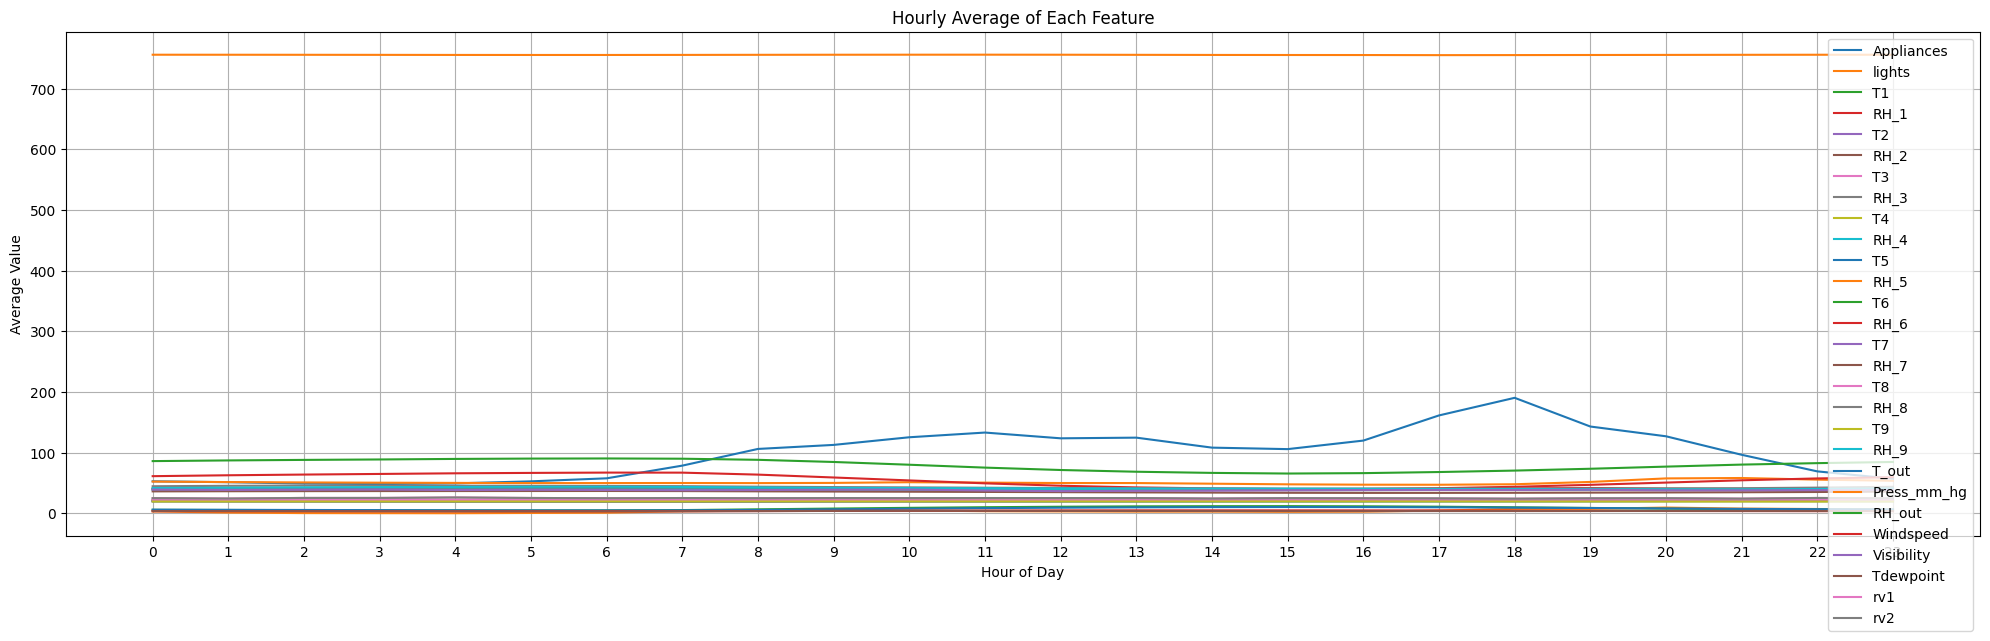

In [ ]:
#Compare the other features to the average hourly energy consumption
#Group data by hour and calculate the mean for each feature
hourly_avg = df.groupby(df.index.hour).mean()

#Create the histogram
plt.figure(figsize=(20, 6))  # Adjust figure size as needed

for column in hourly_avg.columns:
    plt.plot(hourly_avg.index, hourly_avg[column], label=column)

plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.title('Hourly Average of Each Feature')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

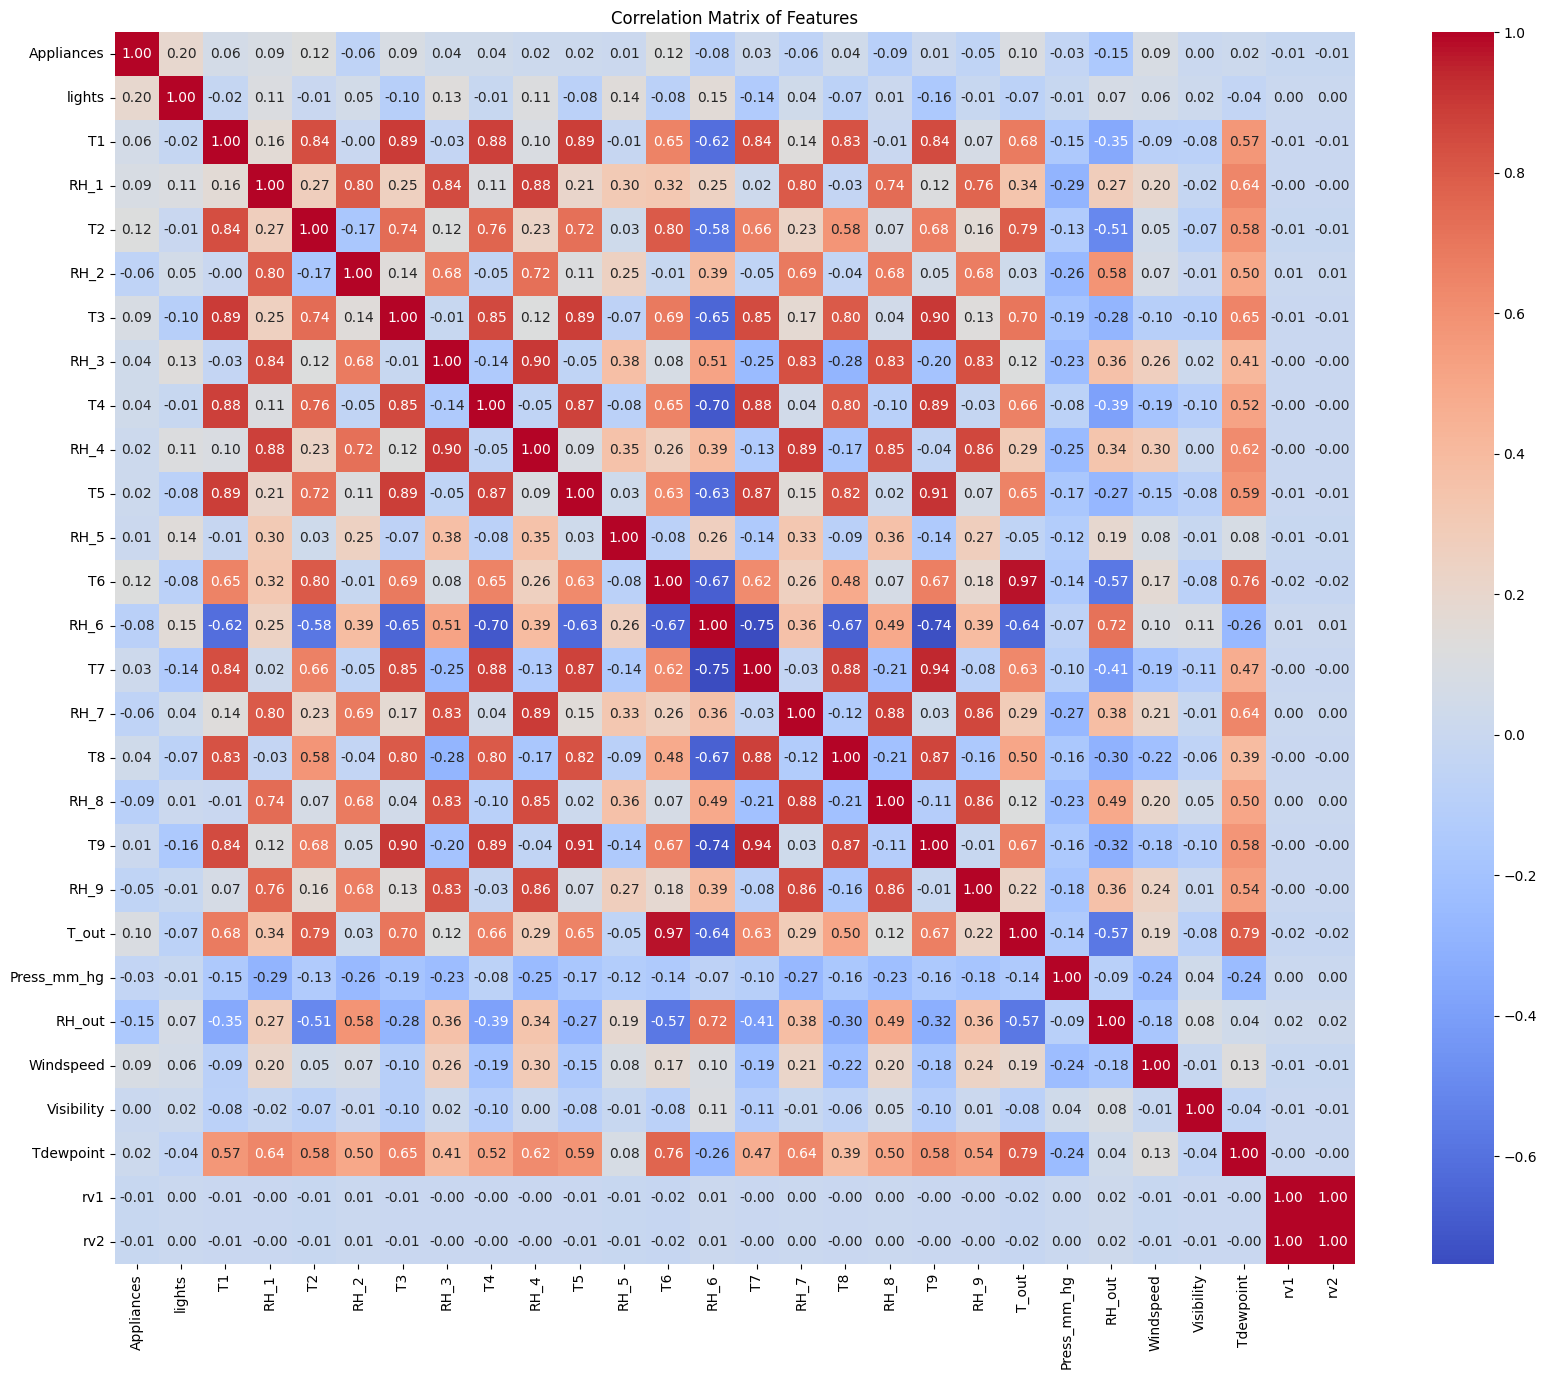

In [ ]:
#Calculate the correlation matrix
corr_matrix = pd.DataFrame(df, columns=df.columns).corr()

#Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

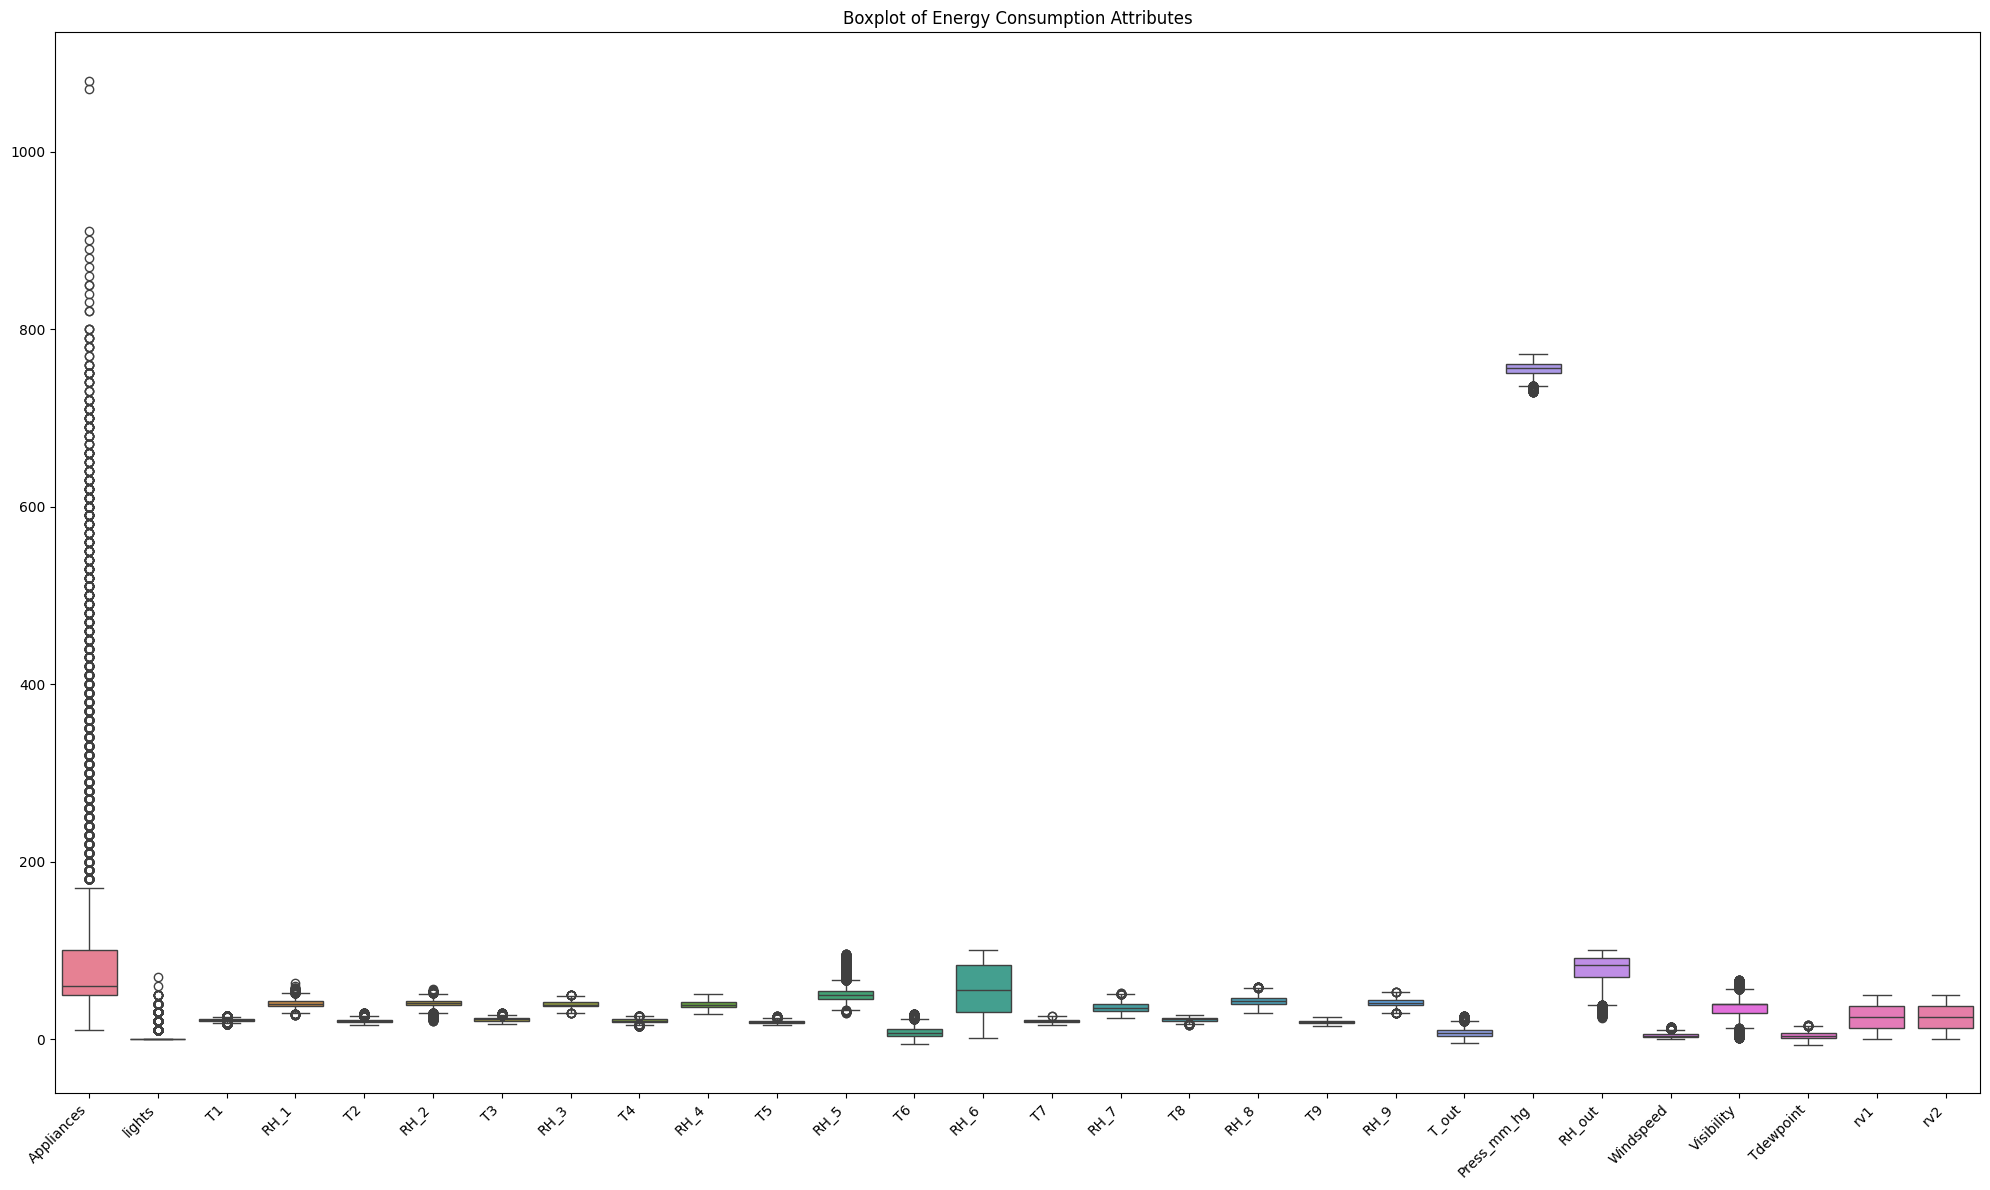

In [ ]:
#Create a boxplot for each feature
plt.figure(figsize=(20, 12))
sns.boxplot(data=df)
plt.title('Boxplot of Energy Consumption Attributes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Data Preprocessing and Feature Engineering

In [ ]:
#Use IQR technique to treat outlier
Q1 = df['Appliances'].quantile(0.25)
Q3 = df['Appliances'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

df['is_outlier'] = (df['Appliances'] < lower_bound) | (df['Appliances'] > upper_bound)
print ("Number of detected outliers:" , df['is_outlier'].sum())

Lower Bound: -25.0
Upper Bound: 175.0
Number of detected outliers: 2138


In [ ]:
#Impute outliers using median
median_value = df['Appliances'].median()
df.loc[df['is_outlier'], 'Appliances'] = median_value

<Axes: xlabel='Appliances', ylabel='Count'>

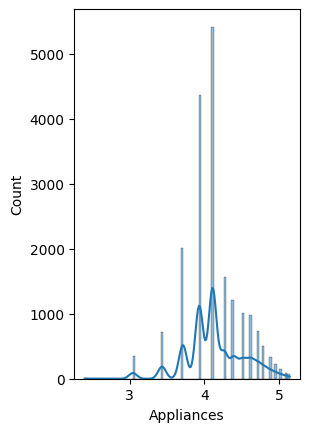

In [ ]:
#log transform data
df= np.log1p(df + .01)


plt.subplot(1,2,2)
sns.histplot(df['Appliances'], kde=True)

In [ ]:
#Extract datetime components
df['hour'] = df.index.hour
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [ ]:
#Get the average Temperature and Humidity inside the house with column T1-T9 and RH_1-RH_9
df['T_in_ave'] = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']].mean(axis=1)
df['RH_in_ave'] = df[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']].mean(axis=1)

In [ ]:
#Interactions
df['t_diff'] = df['T_out'] - df['T_in_ave']
df['r_diff'] = df['RH_out'] - df['RH_in_ave']
df['T*Rh_in'] = df['T_in_ave'] * df['RH_in_ave']

In [ ]:
df=df.dropna()

In [ ]:
#Polynomial and interaction
features = ['hour', 'day' ,'day_of_week', 'T*Rh_in', 't_diff' ,'lights']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

#Create polynomial and interaction features (degree=2 captures pairwise interactions)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[features])
poly_feature_names = poly.get_feature_names_out(features)

#Convert to DataFrame and merge with original data
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
df = pd.concat([df, df_poly], axis=1)

In [ ]:
# Time-based split (e.g., 80% for training, 20% for testing)
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

#Separate features (X) and target (y)
X_train = train_df.drop('Appliances', axis=1)
y_train = train_df['Appliances']
X_test = test_df.drop('Appliances', axis=1)
y_test = test_df['Appliances']

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (13948, 58), (13948,)
Testing data shape: (3488, 58), (3488,)


In [ ]:
#Create a lag feature (1-hour and 2-hour lag)
X_train['lag_1'] = train_df['Appliances'].shift(1)
X_test['lag_1'] = test_df['Appliances'].shift(1)

#Create a rolling average (mean and std over the past 3 hours)
X_train['rolling_mean_3'] = train_df['Appliances'].shift(1).rolling(window=3).mean()
X_train['rolling_std_3'] = train_df['Appliances'].shift(1).rolling(window=3).std()

X_test['rolling_mean_3'] = test_df['Appliances'].shift(1).rolling(window=3).mean()
X_test['rolling_std_3'] = test_df['Appliances'].shift(1).rolling(window=3).std()


#Align y_train and y_test with modified X_train and X_test
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]


X_train.dropna(inplace=True)
X_test.dropna(inplace=True)


In [ ]:
#Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a Baseline Model (Linear Regression)

A simple baseline model helps set a performance benchmark.

In [ ]:
#Initialize and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

#Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

Linear Regression Performance:
RMSE: 16.909410101041637
R2: 0.5599070126934769


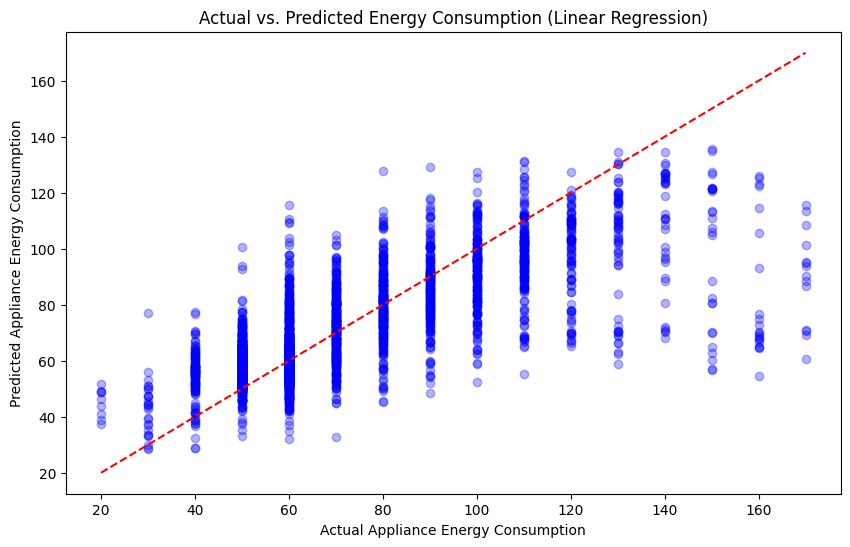

In [ ]:
#Inverse Log transformation for predictions and test data
y_pred_inv_lr = np.expm1(y_pred_lr)
y_test_inv = np.expm1(y_test)

#Evaluate RMSE and R-squared on the inverse transformed data
rmse_lr = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_lr))
r2_lr = r2_score(y_test_inv, y_pred_inv_lr)

print("Linear Regression Performance:")
print("RMSE:", rmse_lr)
print("R2:", r2_lr)

#Plot the actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_inv_lr, alpha=0.3, color='blue')
plt.xlabel('Actual Appliance Energy Consumption')
plt.ylabel('Predicted Appliance Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption (Linear Regression)')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')  # Diagonal line
plt.show()

# Building a More Robust Model

Tree-based ensemble models like Random Forest, XGBoost and Gradient Boost often capture non-linear relationships better than linear models.

Hyperparameter Tuning: Use GridSearchCV to search for the best hyperparameters to potentially improve performance.



# **Random Forest Regressor**

 Random forest regression model combines multiple decision trees to create a single model. Each tree in the forest builds from a different subset of the data and makes its own independent prediction. The final prediction for input is based on the average or weighted average of all the individual trees' predictions.

In [ ]:
#Initialize a RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

#Train the model on your training data
rf.fit(X_train_scaled, y_train)

#Predict on the test set
y_pred_rf = rf.predict(X_test_scaled)

RandomForest Performance:
RMSE: 16.414068874103304
R2: 0.5853133666961222


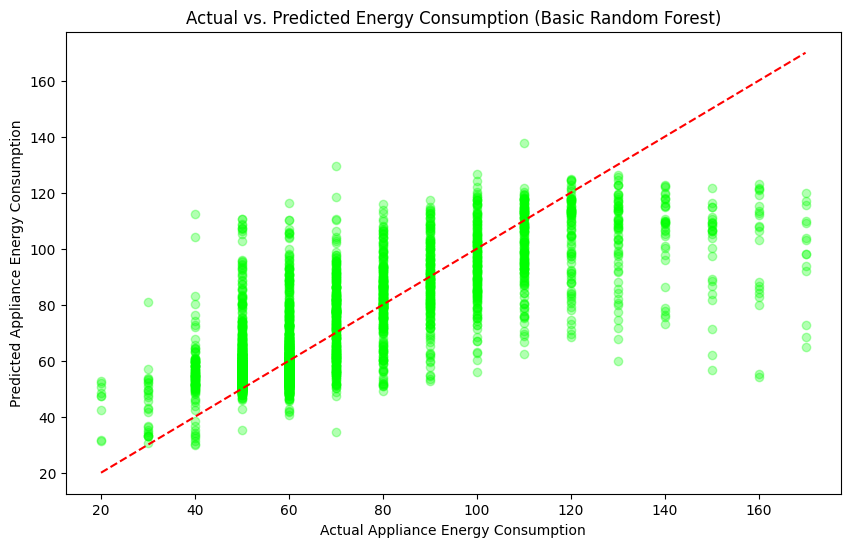

In [ ]:
#Inverse Log transformation for predictions and test data
y_pred_inv_rf = np.expm1(y_pred_rf)


#Evaluate RMSE and R-squared on the inverse transformed data
rmse_rf = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_rf))
r2_rf = r2_score(y_test_inv, y_pred_inv_rf)

print("RandomForest Performance:")
print("RMSE:", rmse_rf)
print("R2:", r2_rf)

#Plot the actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_inv_rf, alpha=0.3, color='lime')
plt.xlabel('Actual Appliance Energy Consumption')
plt.ylabel('Predicted Appliance Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption (Basic Random Forest)')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')  # Diagonal line
plt.show()

In [ ]:
#Define a parameter grid for hyperparameter tuning
param_distributions_rf = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30, 50],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Features considered for splits
}

#Set up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions_rf,
    n_iter=100,  # Number of parameter combinations to try
    cv=3,  # Cross-validation folds
    scoring='neg_mean_squared_error',  # Metric to optimize
    verbose=1,
    random_state=42,
    n_jobs=-1
)

#Fit GridSearchCV on the training data
rf_random_search.fit(X_train_scaled, y_train)

#Retrieve the best estimator and parameters
print("Best parameters:", rf_random_search.best_params_)
best_rf = rf_random_search.best_estimator_


#Predict on the test set using the best RandomForest model
y_pred_rf_hpt = best_rf.predict(X_test_scaled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50}


Tuned RandomForest Regression Performance:
RMSE: 16.613879809015682
R2: 0.5751558303020057


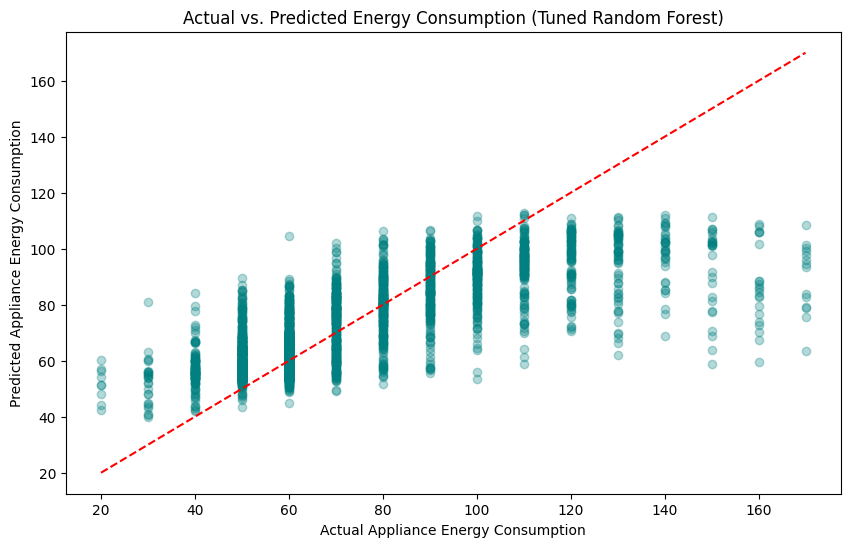

In [ ]:
#Inverse Log transformation for predictions and test data
y_pred_inv_rf_hpt = np.expm1(y_pred_rf_hpt)


#Evaluate RMSE and R-squared on the inverse transformed data
rmse_rf_hpt = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_rf_hpt))
r2_rf_hpt = r2_score(y_test_inv, y_pred_inv_rf_hpt)

print("Tuned RandomForest Regression Performance:")
print("RMSE:", rmse_rf_hpt)
print("R2:", r2_rf_hpt)

#Plot actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_inv_rf_hpt, alpha=0.3, color='teal')
plt.xlabel('Actual Appliance Energy Consumption')
plt.ylabel('Predicted Appliance Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption (Tuned Random Forest)')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')  # Diagonal line
plt.show()

# XGBoost Regressor

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
#Initialize the XGBoost regressor
xgb= XGBRegressor(objective='reg:squarederror', random_state=42)

#Train the model on your training data
xgb.fit(X_train_scaled, y_train)

#Predict on the test set
y_pred_xgb = xgb.predict(X_test_scaled)

XGBoosting Performance:
RMSE: 21.597546726168755
R2: 0.2820463982034628


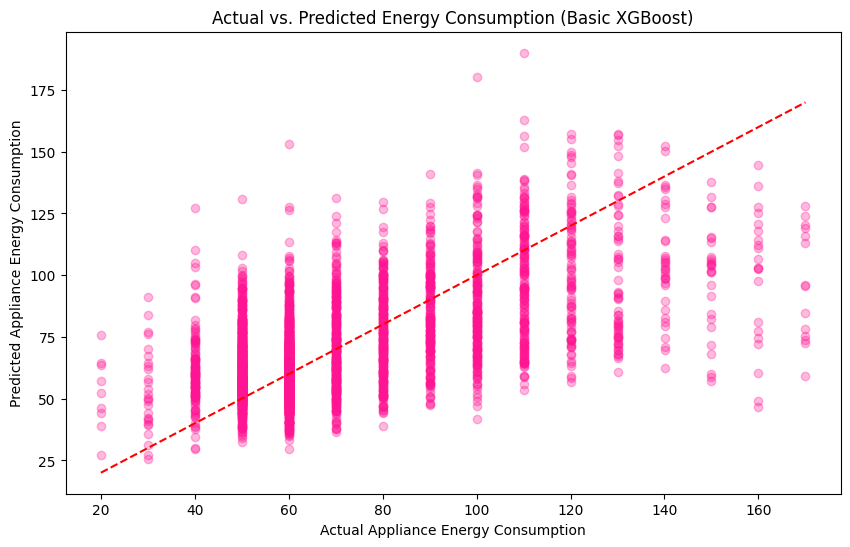

In [ ]:
#Inverse Log transformation for predictions and test data
y_pred_inv_xgb = np.expm1(y_pred_xgb)


#Evaluate RMSE and R-squared on the inverse transformed data
rmse_xgb = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_xgb))
r2_xgb = r2_score(y_test_inv, y_pred_inv_xgb)

print("XGBoosting Performance:")
print("RMSE:", rmse_xgb)
print("R2:", r2_xgb)

#Plot actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_inv_xgb, alpha=0.3, color='deeppink')
plt.xlabel('Actual Appliance Energy Consumption')
plt.ylabel('Predicted Appliance Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption (Basic XGBoost)')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')  #Diagonal line
plt.show()

In [ ]:
#Define a parameter grid for hyperparameter tuning
param_distributions_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions_xgb,
    n_iter=100,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#Fit GridSearchCV on the training data
xgb_random_search.fit(X_train_scaled, y_train)

#Retrieve the best estimator and parameters
print("Best parameters for XGBoost:", xgb_random_search.best_params_)
best_xgb = xgb_random_search.best_estimator_


#Predict on the test set using the best XGBoost model
y_pred_xgb_hpt = best_xgb.predict(X_test_scaled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


Tuned XGBoosting Performance:
RMSE: 15.840982731596744
R2: 0.6137648676367151


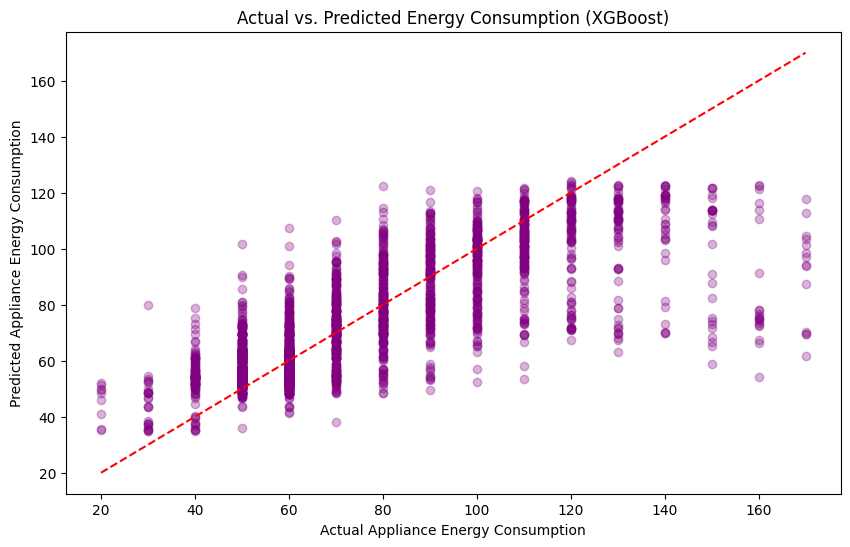

In [ ]:
#Inverse Log transformation for predictions and test data
y_pred_inv_xgb_hpt = np.expm1(y_pred_xgb_hpt)


#Evaluate RMSE and R-squared on the inverse transformed data
rmse_xgb_hpt = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_xgb_hpt))
r2_xgb_hpt = r2_score(y_test_inv, y_pred_inv_xgb_hpt)

print("Tuned XGBoosting Performance:")
print("RMSE:", rmse_xgb_hpt)
print("R2:", r2_xgb_hpt)

#Plot actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_inv_xgb_hpt, alpha=0.3, color='purple')
plt.xlabel('Actual Appliance Energy Consumption')
plt.ylabel('Predicted Appliance Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption (XGBoost)')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')  #Diagonal line
plt.show()

# **Gradient Boosting Regressor**

Gradient boosting regression trees are based on the idea of an ensemble method derived from a decision tree. The decision tree uses a tree structure. Starting from tree root, branching according to the conditions and heading toward the leaves, the goal leaf is the prediction result.

In [ ]:
#Initialize the Gradient Boosting Regressor with default parameters
gbr = GradientBoostingRegressor(random_state=42)

#Train the model on your training data
gbr.fit(X_train_scaled, y_train)

#Predict on the test set
y_pred_gbr = gbr.predict(X_test_scaled)

Gradient Boosting Regression  Performance:
RMSE: 15.76380956443592
R2: 0.6175189759482083


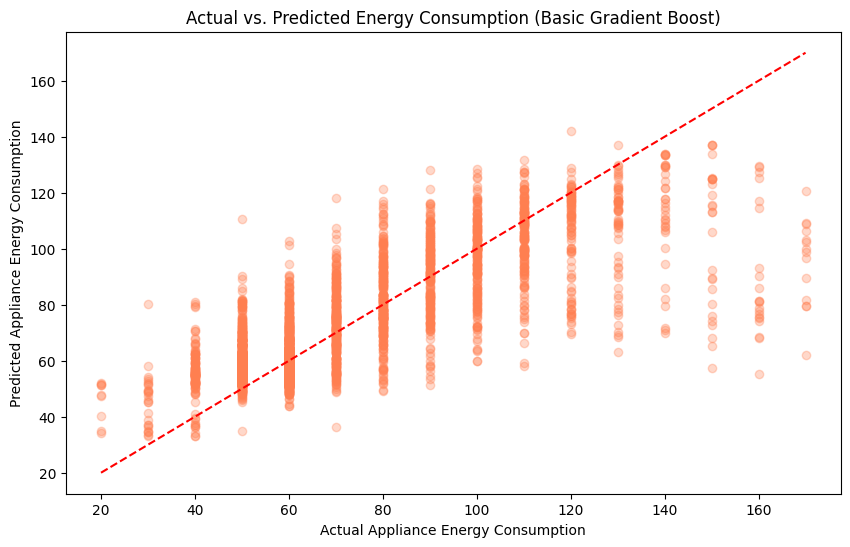

In [ ]:
#Inverse Log transformation for predictions and test data
y_pred_inv_gbr = np.expm1(y_pred_gbr)


#Evaluate RMSE and R-squared on the inverse transformed data
rmse_gbr = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_gbr))
r2_gbr = r2_score(y_test_inv, y_pred_inv_gbr)

print("Gradient Boosting Regression  Performance:")
print("RMSE:", rmse_gbr)
print("R2:", r2_gbr)

#Plot actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_inv_gbr, alpha=0.3, color='coral')
plt.xlabel('Actual Appliance Energy Consumption')
plt.ylabel('Predicted Appliance Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption (Basic Gradient Boost)')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')  #Diagonal line
plt.show()

In [ ]:
# Define the hyperparameter grid
param_distributions_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up RandomizedSearchCV
gb_random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_distributions_gb,
    n_iter=100,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#Fit GridSearchCV to the training data
gb_random_search.fit(X_train_scaled, y_train)

#Retrieve the best estimator and parameters
print("Best parameters for Gradient Boosting:", gb_random_search.best_params_)
best_gbr = gb_random_search.best_estimator_

#Predict using the best estimator
y_pred_gbr_hpt = best_gbr.predict(X_test_scaled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for Gradient Boosting: {'subsample': 0.6, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.1}


Tuned Gradient Boosting Regression Performance:
RMSE: 16.180157766649547
R2: 0.5970482577021148


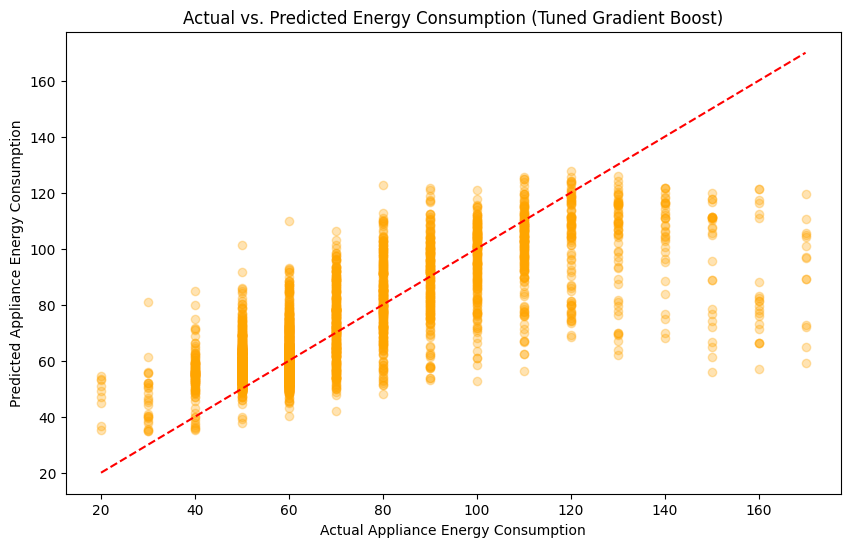

In [ ]:
#Inverse Log transformation for predictions and test data
y_pred_inv_gbr_hpt = np.expm1(y_pred_gbr_hpt)


#Evaluate RMSE and R-squared on the inverse transformed data
rmse_gbr_hpt = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_gbr_hpt))
r2_gbr_hpt = r2_score(y_test_inv, y_pred_inv_gbr_hpt)

print("Tuned Gradient Boosting Regression Performance:")
print("RMSE:", rmse_gbr_hpt)
print("R2:", r2_gbr_hpt)

#Plot actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_inv_gbr_hpt, alpha=0.3, color='Orange')
plt.xlabel('Actual Appliance Energy Consumption')
plt.ylabel('Predicted Appliance Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption (Tuned Gradient Boost)')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')  #Diagonal line
plt.show()

# **Stacking models**
Stacking combines predictions from multiple models (base model) by training a meta model on their output

In [ ]:
#Staking the models using their best parameters
base_model = [
    ('rf', RandomForestRegressor(**rf_random_search.best_params_,
                                 random_state=42)),
    ('xgb', XGBRegressor(**xgb_random_search.best_params_,
                             random_state=42)),
    ('gbr', GradientBoostingRegressor(**gb_random_search.best_params_,
                                      random_state=42))
]

meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_model, final_estimator=meta_model)
stacking_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_stacking = stacking_model.predict(X_test_scaled)

Model Stacking Performance:
RMSE: 15.755249643583372
R2: 0.6179342459207663


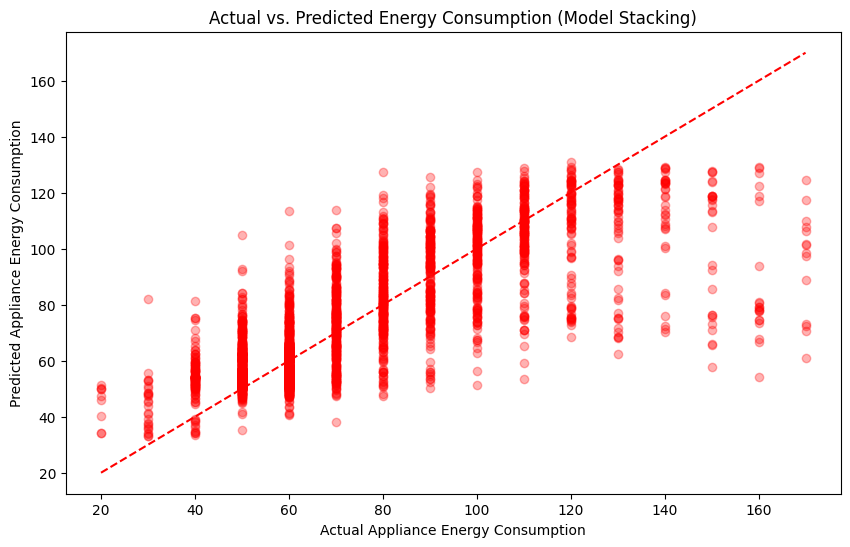

In [ ]:
#Inverse Log transformation for predictions and test data
y_pred_inv_stacking = np.expm1(y_pred_stacking)


#Evaluate RMSE and R-squared on the inverse transformed data
rmse_stacking = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_stacking))
r2_stacking = r2_score(y_test_inv, y_pred_inv_stacking)

print("Model Stacking Performance:")
print("RMSE:", rmse_stacking)
print("R2:", r2_stacking)

#Plot actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_inv_stacking, alpha=0.3, color='red')
plt.xlabel('Actual Appliance Energy Consumption')
plt.ylabel('Predicted Appliance Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption (Model Stacking)')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')  #Diagonal line
plt.show()

# **Metrics Comparison:**

**RMSE (Root Mean Squared Error)**: Lower values indicate better model performance.


**R² (Coefficient of Determination)**: Values closer to 1 indicate that the model explains most of the variance in the target.

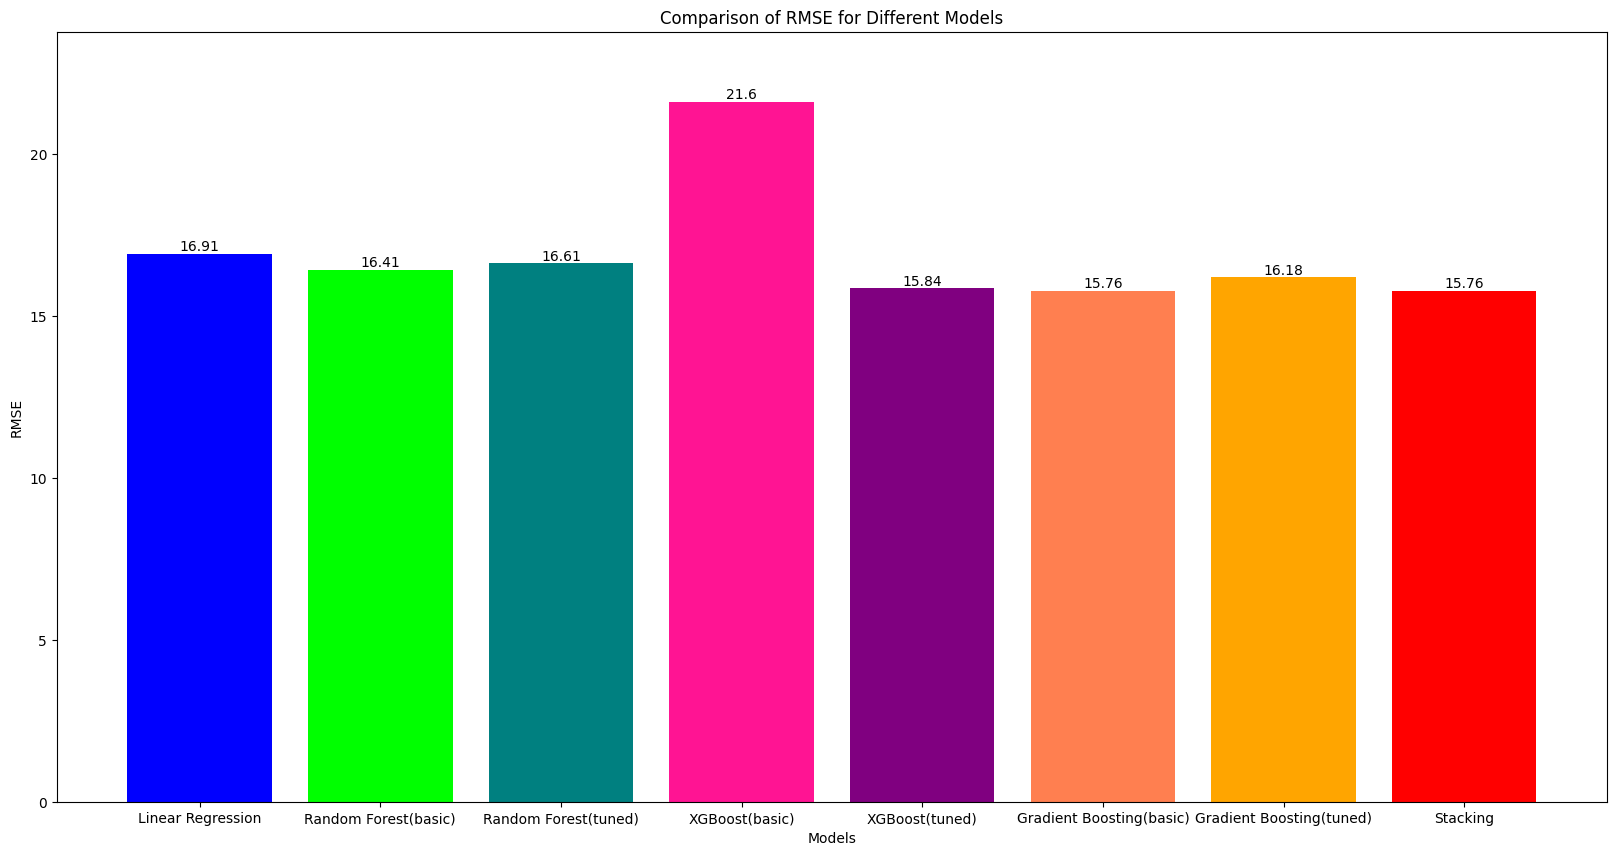

                      Model       RMSE
7                  Stacking  15.755250
5  Gradient Boosting(basic)  15.763810
4            XGBoost(tuned)  15.840983


In [ ]:
#Compare the RMSE of the models. the lower the better
rmse_values = {
    'Linear Regression': rmse_lr,
    'Random Forest(basic)': rmse_rf,
    'Random Forest(tuned)': rmse_rf_hpt,
    'XGBoost(basic)': rmse_xgb,
    'XGBoost(tuned)': rmse_xgb_hpt,
    'Gradient Boosting(basic)': rmse_gbr,
    'Gradient Boosting(tuned)': rmse_gbr_hpt,
    'Stacking': rmse_stacking
}

models = list(rmse_values.keys())
rmse = list(rmse_values.values())

plt.figure(figsize=(20, 10))
plt.bar(models, rmse, color=['blue', 'lime' ,'teal', 'deeppink','purple', 'coral','Orange', 'red'])
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Comparison of RMSE for Different Models")
plt.ylim(0, max(rmse) * 1.1)

for i, v in enumerate(rmse):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

# Convert the dictionary to a DataFrame
df_rmse = pd.DataFrame(list(rmse_values.items()), columns=['Model', 'RMSE'])

# Sort the DataFrame by RMSE in ascending order
df_rmse_sorted = df_rmse.sort_values(by='RMSE', ascending=True)

# Print the top 3 models
print(df_rmse_sorted.head(3))

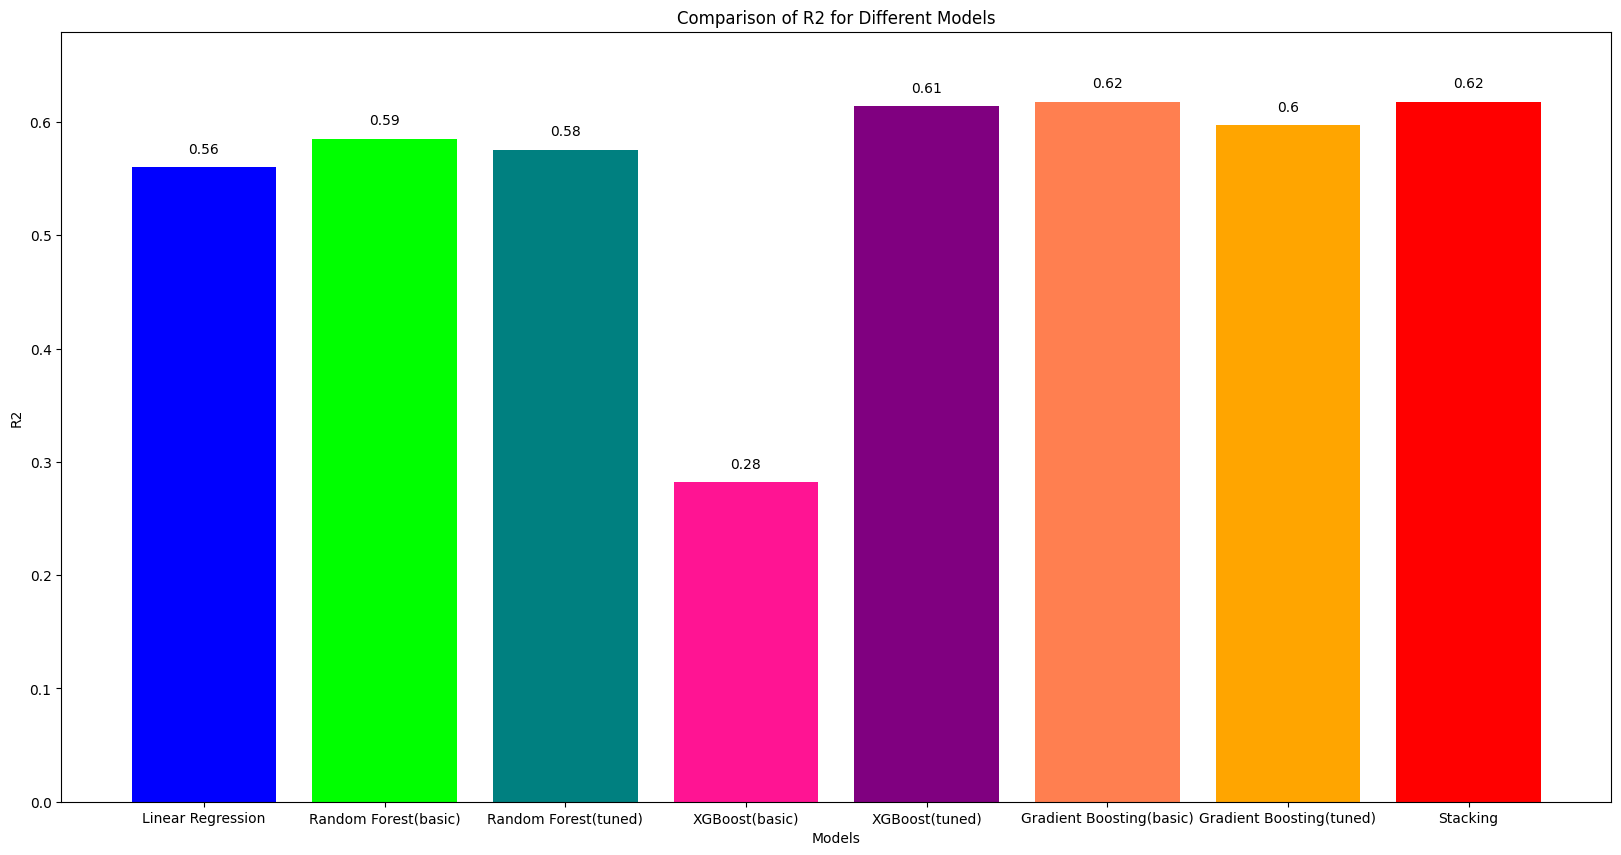

                      Model        R2
7                  Stacking  0.617934
5  Gradient Boosting(basic)  0.617519
4            XGBoost(tuned)  0.613765


In [ ]:
#Compare the R2 of the models. the higher the better
r2_values = {
    'Linear Regression': r2_lr,
    'Random Forest(basic)': r2_rf,
    'Random Forest(tuned)': r2_rf_hpt,
    'XGBoost(basic)': r2_xgb,
    'XGBoost(tuned)': r2_xgb_hpt,
    'Gradient Boosting(basic)': r2_gbr,
    'Gradient Boosting(tuned)': r2_gbr_hpt,
    'Stacking': r2_stacking
}

models = list(r2_values.keys())
r2 = list(r2_values.values())

plt.figure(figsize=(20, 10))
plt.bar(models, r2, color=['blue', 'lime' ,'teal', 'deeppink','purple', 'coral','Orange', 'red'])
plt.xlabel("Models")
plt.ylabel("R2")
plt.title("Comparison of R2 for Different Models")
plt.ylim(0, max(r2) * 1.1)

for i, v in enumerate(r2):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.show()

# Convert the dictionary to a DataFrame
df_r2 = pd.DataFrame(list(r2_values.items()), columns=['Model', 'R2'])

# Sort the DataFrame by R2 in ascending order
df_r2_sorted = df_r2.sort_values(by='R2', ascending=False)

# Print the top 3 models
print(df_r2_sorted.head(3))

# **Residual Analysis**

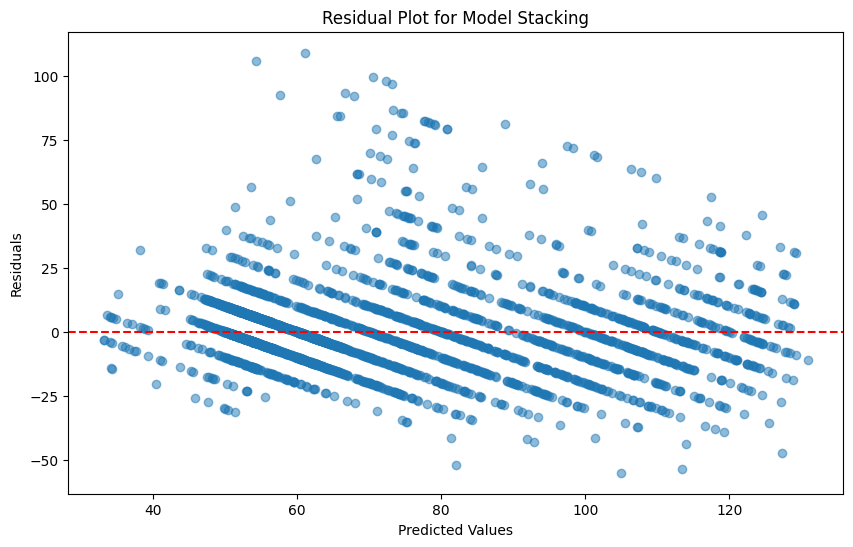

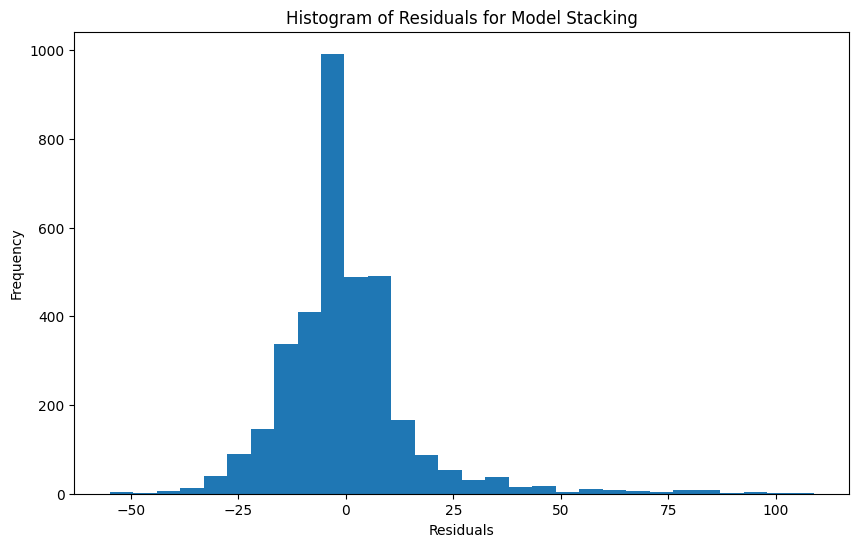

<Figure size 1000x600 with 0 Axes>

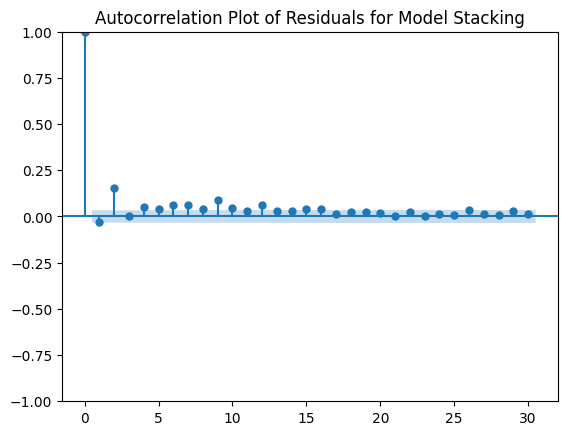

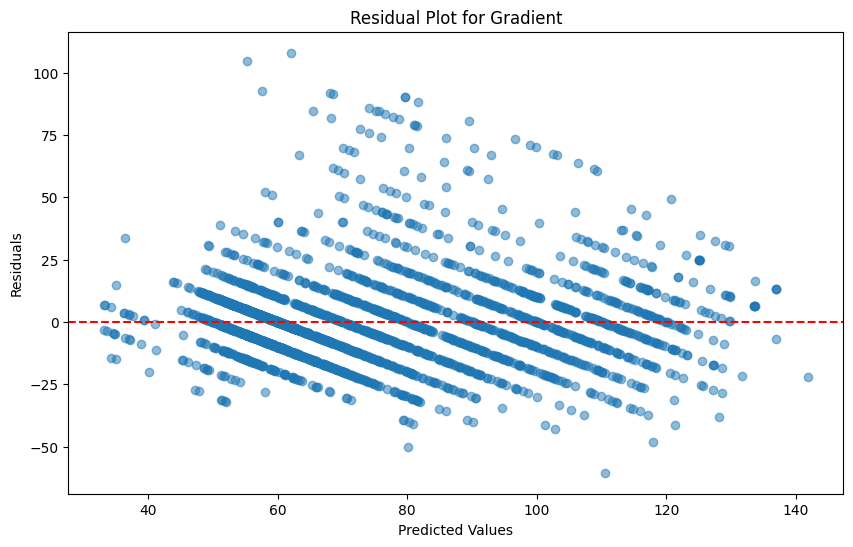

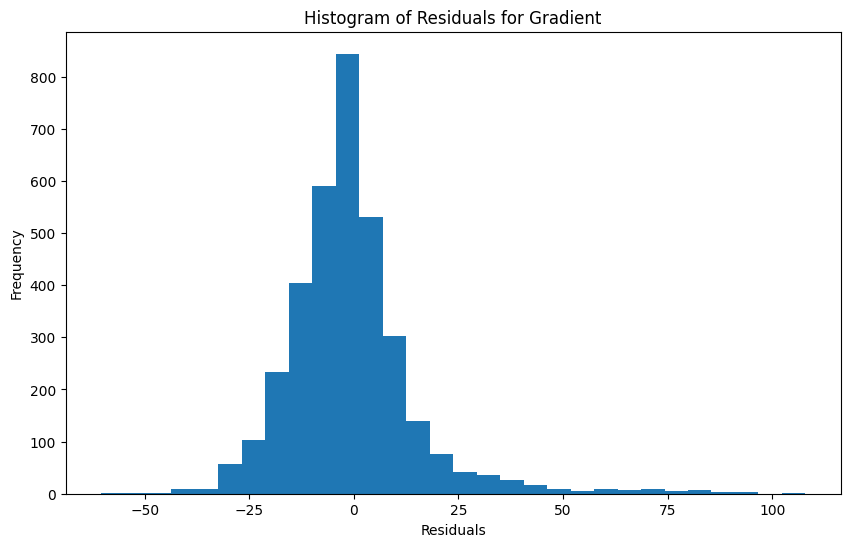

<Figure size 1000x600 with 0 Axes>

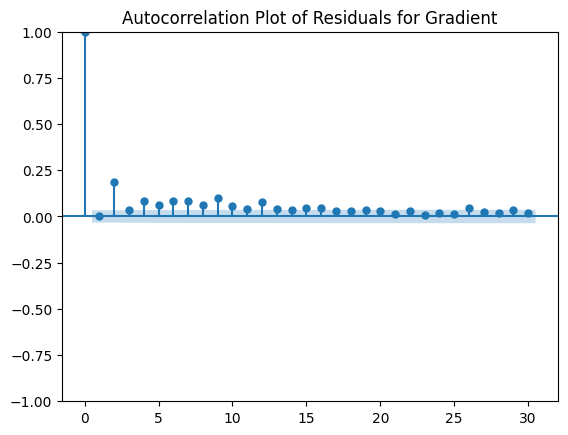

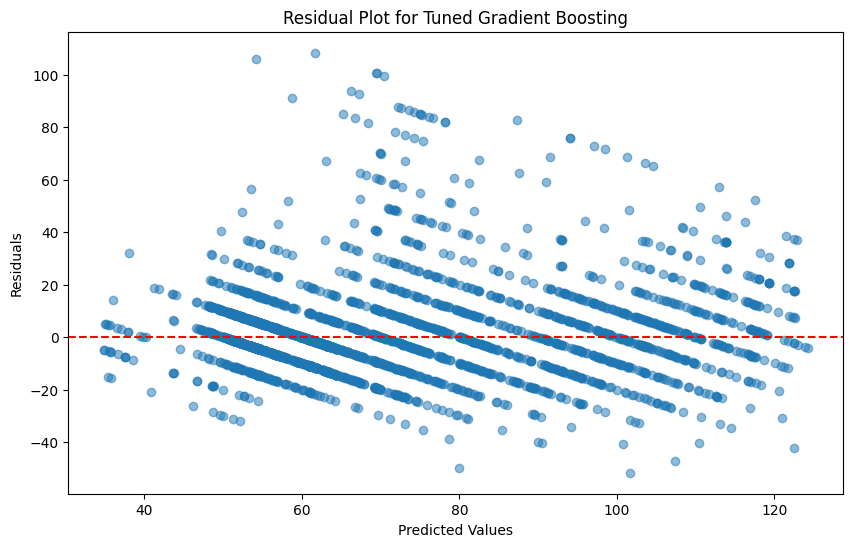

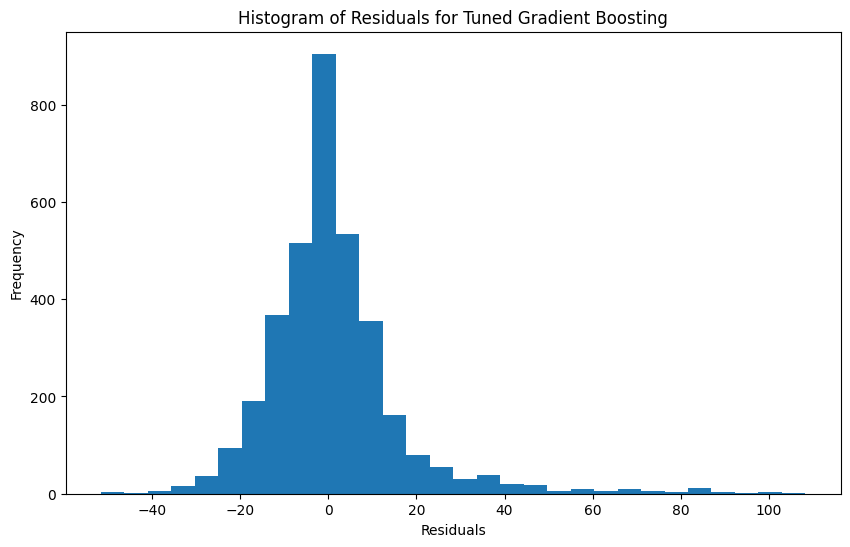

<Figure size 1000x600 with 0 Axes>

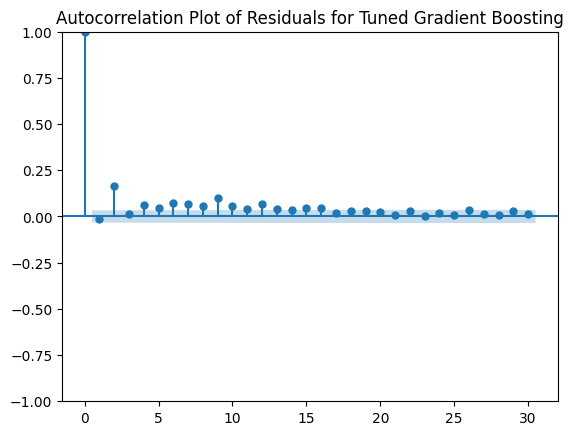

In [ ]:
#Top 3 models
models = [stacking_model, gbr, best_xgb]
model_names = ['Model Stacking', 'Gradient', 'Tuned Gradient Boosting']

for model, name in zip(models, model_names):
    y_pred_res= model.predict(X_test_scaled)
    y_pred_res_inv = np.expm1(y_pred_res)
    residuals = y_test_inv - y_pred_res_inv

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_res_inv, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for {name}")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Residuals for {name}")
    plt.show()

    # Check for autocorrelation
    plt.figure(figsize=(10, 6))
    plot_acf(residuals, lags=30)
    plt.title(f"Autocorrelation Plot of Residuals for {name}")
    plt.show()



# **Save and Export model**

In [ ]:
# #Save the model to a file
# joblib.dump(best_xgb, 'XGBoost_ with_Hyperparameter_Tuning_model.pkl')

# # Optionally, download the file to your local machine
# files.download('best_xgb_model.pkl')

# **CONCLUSION AND RECOMMENDATION**

In conclusion, XGBoost with hyperparameter tuning and basic Gradient Boosting  were the best models for predicting appliance energy consumption, achieving the lowest error and highest accuracy. The Stacking model also performed well and offered robust predictions. While Linear Regression showed decent results, it may not be ideal for real-world scenarios due to its limitations in capturing complex relationships. Therefore, it is recommended to use XGBoost with hyperparameter tuning, Gradient Boosting, or the Stacking model for this task, while considering further exploration and validation of the Stacking model. Remember to adapt the model based on data and context for optimal performance.



Based on the model's prediction and best practices in energy management, here are some key recommendations:

1.   **Smart Appliance Usage**

    *   Use energy-efficient appliances
    *   Schedule high-energy consumption appliances (e.g., washing machine, dishwashers) during off-peak hours to take advantage of lower electricity rates.

2.  **Improve Insulation and Climate Control**

    *   Optimize home insulation to reduce cooling and heating energy demands
    *   Use smart thermostats that adjust settings based on real-time occupancy and weather conditions.

3.  **Real-time Monitoring & AI-driven insights**

    *   Utilize smart meters and AI-based analytics to get real-time consumption feedback
    *   Encourage customers to track and adjust their energy habits based on data-driven insights.

**Recommendations for Power Grid Management:**

1.  **Demand Response Optimization**

    *  Implement dynamic pricing models to incentivize customer to shift energy-intensive activities to off-peak hours, reducing strain on the grid.
    *   Deploy real-time energy monitoring systems to predict peak demand periods and adjust supply accordingly.

2.  **Load Balance and Predictive Grid Management**

    *   Utilize the developed machine learning model to forecast high-load periods based on weather, historical usage patterns, and real time data.
    *   Implement smart load balancing to dynamically allocate power based on predicted demand fluctuations.

3.  **Renewable Energy Integration**

    *   Promote the use of distributed energy resources (DERs) such as solar and wind power by integrating smart grid technology that adjusts energy flow based on production levels.
    *   Implement battery energy storage systems to store excess renewable energy for use during peak demand periods.

4.  **Infrastructure Resilience and Stability**

    *   Upgrade the grid infrastructure to support bidirectional energy flows, allowing households with solar panels to feed energy back into the grid.
    *   Use fault detection algorithms and predictive maintenance to prevent outages and optimize maintenance schedules.

These recommendations can improve energy cost, energy optimization, and grid management to a more resilient and sustainable energy system.

